# **Task 1: Chest X-Ray Images (Pneumonia) Classification**
##### A labelled dataset of 5,232 chest X-ray images from children, including 3,883 characterized as depicting pneumonia (2,538 bacterial and 1,345 viral) and 1,349 normal, from a total of 5,856 patients to train the AI system. 

### **Import Data**
The data is imported from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/data/315_Birds_Species.zip 

Streaming output truncated to the last 5000 lines.
  inflating: train/GOLDEN CHLOROPHONIA/090.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/091.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/092.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/093.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/094.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/095.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/096.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/097.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/098.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/099.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/100.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/101.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/102.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/103.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/104.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/105.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/106.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/107.jpg  
  inflating: train/GOLDEN CHLOROPHONIA/108.jpg  
  inflating: train

In [ ]:
!pip install split-folders

In [6]:
#Some Basic Imports
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
#Define Directories for train, test & Validation Set
train_path = '/content/train'
test_path = '/content/test'
valid_path = '/content/valid'
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16 
#The dimension of the images we are going to define is 224 x 224
img_height = 224
img_width = 224
#The dimension size of 500 or more than 500 with batch size greater than 16 may result in a crash as the RAM gets completely used in such cases. A lower dimension size with greater batch size is one of the options to try.

### **Data Augmentation**

The image Augmentation is a technique to expand the dataset.It is a recommended way to increase the size of orignal dataset by transforming the images i.e rotation, brightness,shifts,flips etc..
In this task, Keras ImageDataGenerator class is used for data augmentation.One of the main reason to choose this method for augmentation is that it provides real-time augmented images. Moreover, it requires lower memory usage.
In this task techniques used are:

1.   Zoom
2.   Flips
3.   Shear









In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In the snippet below, 


*   The input is reformatted to dimension 224 by 224 as this ensures uniformity accross all images.
*   The validation split is 0.2. This implies that the 80% of data will be reserved for training and 20% for validation.
*   The subset for training, validation and testing is being created.


In [8]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      class_mode='categorical',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      shuffle=False, 
      #setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='categorical',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


### **VGG16 model**
VGG16 is a widely used Convolutional Neural Network architecture with 16 layers. It is easy to implement and can be used for classification problems.Furthermore, the pre-trained model of vgg16 can also be used which is trained on Imagenet dataset.
In this task, we are using VGG16 pretrained model.The benefit of this is that the weights are not randomly intialized rather they are fine tuned weights.


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [10]:
# load VGG16 model without classification layers
vgg16_model = VGG16(include_top=False,weights='imagenet', input_shape=(224, 224, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [11]:
for layer in vgg16_model.layers:
  layer.trainable= False

In [12]:
flatten_layer = Flatten()  # instantiate the layer

In [13]:
X= flatten_layer(vgg16_model.output)

In [14]:
prediction=Dense(315,activation='softmax')(X)

In [15]:
model=Model(inputs=vgg16_model.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

##### **Train the model**
The model is being trained over 10 epochs. Furthermore, the trained accuracy is 97% in comparison with the validation accuracy which is 92%

In [17]:
r=model.fit(
    train,
    validation_data=valid,
    epochs=10,
    )

Epoch 1/10
2874/2874 [==============================] - 733s 243ms/step - loss: 6.5860 - accuracy: 0.3393 - val_loss: 3.7124 - val_accuracy: 0.6146
Epoch 2/10
2874/2874 [==============================] - 692s 241ms/step - loss: 4.1284 - accuracy: 0.5841 - val_loss: 3.8092 - val_accuracy: 0.6698
Epoch 3/10
2874/2874 [==============================] - 689s 240ms/step - loss: 3.3509 - accuracy: 0.6672 - val_loss: 3.5675 - val_accuracy: 0.6952
Epoch 4/10
2874/2874 [==============================] - 680s 237ms/step - loss: 2.9441 - accuracy: 0.7171 - val_loss: 2.9166 - val_accuracy: 0.7670
Epoch 5/10
2874/2874 [==============================] - 689s 240ms/step - loss: 2.4524 - accuracy: 0.7602 - val_loss: 3.3834 - val_accuracy: 0.7448
Epoch 6/10
2874/2874 [==============================] - 689s 240ms/step - loss: 2.1755 - accuracy: 0.7881 - val_loss: 3.3357 - val_accuracy: 0.7759
Epoch 7/10
2874/2874 [==============================] - 688s 239ms/step - loss: 2.0031 - accuracy: 0.8109 - val_

### **Graphs**

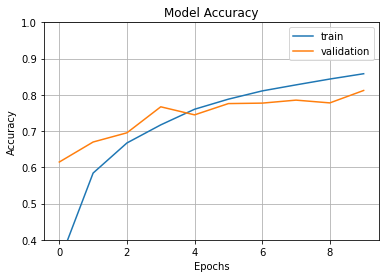

<Figure size 432x288 with 0 Axes>

In [18]:
fig1 = plt.gcf()
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.savefig('vgg-acc-val-acc.pdf')

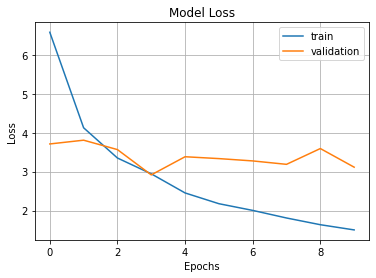

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.savefig('vgg-loss-val.pdf')

### **Model Accuracy**

In [20]:
test_accu = model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

99/99 [==============================] - 13s 127ms/step - loss: 2.7671 - accuracy: 0.8267
The testing accuracy is : 82.66666531562805 %


In [21]:
preds = model.predict(test,verbose=1)

99/99 [==============================] - 12s 121ms/step


### **GRAD-CAM**
GradCam is an algorithm which shows that which part of the feature map, this CNN is giving importance for classification.


In [23]:
model = VGG16()
model.summary()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
553476096/553467096 [==============================] - 10s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856 

In [24]:
# load the image and preprocess it
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import load_img,img_to_array
from numpy import expand_dims
img = load_img(('/content/2.jpg'), target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

In [25]:
# separate the classifier layer names in a list
classifier_layer_names = ['block5_pool', 'flatten', 'fc1', 'fc2', 
                          'predictions']

In [27]:
# get the last conv layer
last_conv_layer = model.get_layer('block5_conv3')

In [28]:
# new model that outputs last conv layer's feature map
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [29]:
# We create a model that maps the activations of the last conv
# layer to the final class predictions

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [30]:

# Then, we compute the gradient of the top predicted class for our input image
# with respect to the activations of the last conv layer

with tf.GradientTape() as tape:
    # Compute activations of the last conv layer and make the tape watch it
    last_conv_layer_output = last_conv_layer_model(img)
    tape.watch(last_conv_layer_output)
    # Compute class predictions
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

In [31]:
# This is the gradient of the top predicted class with regard to
# the output feature map of the last conv layer
grads = tape.gradient(top_class_channel, last_conv_layer_output)

# This is a vector where each entry is the mean intensity of the gradient
# over a specific feature map channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the top predicted class
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(last_conv_layer_output, axis=-1)

# For visualization purpose, we will also normalize the heatmap between 0 & 1
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

49152/35363 [=========================================] - 0s 0us/step
[('n01531178', 'goldfinch', 0.99999964)]


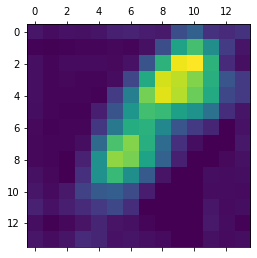

<Figure size 432x288 with 0 Axes>

In [32]:
from keras.applications.vgg16 import decode_predictions

# print top class prediction

print(decode_predictions(model.predict(img), top=1)[0])
# Display heatmap
plt.matshow(heatmap)
plt.show()
plt.savefig('grad-camvgg.pdf')

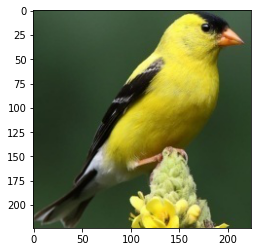

<Figure size 432x288 with 0 Axes>

In [33]:
from skimage.transform import resize
# load original image
orig_img = keras.preprocessing.image.load_img('/content/2.jpg')

# upsample the heatmap
upsample = resize(heatmap, (224,224),preserve_range=True)

# show the heatmap overlayed on original image
plt.imshow(orig_img)
# plt.imshow(upsample,alpha=0.7)
plt.show()
plt.savefig('gradcamorig.pdf')

### **RESNET-50**
ResNet stands for Residual Network. The authots resNet introduced the concept of skip connections. The skip connections skips some of the layers in the neural networks and feeds that output of one layer as the input to the next. The skip connections, solve the problem of vanishing gradient which mostly occurs because of the deep layers in convolutional networks.
e suggests skips some of the layers in the neural network and feeds the output of one layer as the input to the next layers.
The varient of Resnet; Resnet50 uses 3-layer bottleneck blocks to ensure improved accuracy and lesser training time.




In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # version 2.5
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU, Softmax
from tensorflow.keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, Reshape, Activation, InputLayer
from tensorflow.keras.layers import BatchNormalization

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer


In [35]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=315,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(315, activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [36]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 315)               161595    
                                                                 
Total params: 24,798,395
Trainable params: 1,210,683
Non-trainable params: 23,587,712
_________________________________________________________________


In [37]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

### **Train the model**

In [38]:
history = resnet_model.fit(
  train,
  validation_data=valid,
  epochs=10
  
)

Epoch 1/10
2874/2874 [==============================] - 688s 238ms/step - loss: 5.7518 - accuracy: 0.0053 - val_loss: 5.7555 - val_accuracy: 0.0032
Epoch 2/10
 482/2874 [====>.........................] - ETA: 9:18 - loss: 5.7438 - accuracy: 0.0049

KeyboardInterrupt: ignored

#### **Graphs**

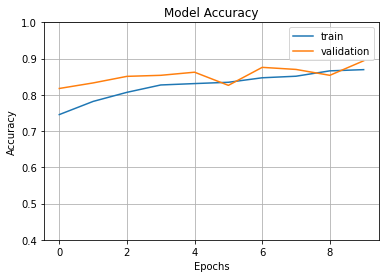

<Figure size 432x288 with 0 Axes>

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.savefig('resnet-acc-valacc.pdf')

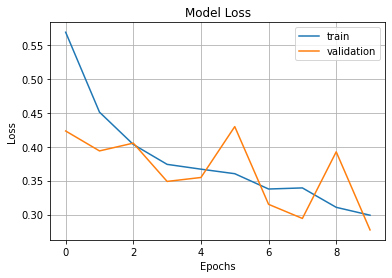

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
plt.savefig('resnet-train-val.pdf')

### **Model Accuracy**

In [ ]:
test_accu = resnet_model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

39/39 [==============================] - 8s 189ms/step - loss: 0.4416 - accuracy: 0.7772
The testing accuracy is : 77.72436141967773 %


In [ ]:
preds = resnet_model.predict(test,verbose=1)

39/39 [==============================] - 8s 185ms/step


### **GRAD-CAM**


In [ ]:
# load the image and preprocess it
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import load_img,img_to_array
from numpy import expand_dims
img = load_img(('/content/person3_virus_15.jpeg'), target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

In [ ]:
# separate the classifier layer names in a list
classifier_layer_names = ['resnet50', 'flatten', 'dense', 'dense_1']

In [ ]:
# get the last conv layer
last_conv_layer = resnet_model.get_layer('dense')

# new model that outputs last conv layer's feature map
last_conv_layer_model = keras.Model(resnet_model.inputs, last_conv_layer.output)

In [ ]:
# We create a model that maps the activations of the last conv
# layer to the final class predictions

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = resnet_model.get_layer(layer_name)(x)
  
classifier_model = keras.Model(classifier_input, x)

In [ ]:

# Then, we compute the gradient of the top predicted class for our input image
# with respect to the activations of the last conv layer

with tf.GradientTape() as tape:
    # Compute activations of the last conv layer and make the tape watch it
    last_conv_layer_output = last_conv_layer_model(img)
    tape.watch(last_conv_layer_output)
    # Compute class predictions
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

In [ ]:
# This is the gradient of the top predicted class with regard to
# the output feature map of the last conv layer
grads = tape.gradient(top_class_channel, last_conv_layer_output)

# This is a vector where each entry is the mean intensity of the gradient
# over a specific feature map channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the top predicted class
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(last_conv_layer_output, axis=-1)

# For visualization purpose, we will also normalize the heatmap between 0 & 1
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

In [ ]:
from keras.applications.resnet50 import decode_predictions

# print top class prediction

print(decode_predictions(model.predict(img), top=1)[0])
# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
# load original image
orig_img = keras.preprocessing.image.load_img('/content/person3_virus_15.jpeg')

# upsample the heatmap
upsample = resize(heatmap, (224,224),preserve_range=True)

# show the heatmap overlayed on original image
plt.imshow(orig_img)
# plt.imshow(upsample,alpha=0.7)
plt.show()

### **Conclusions**
The vgg16 model yielded better results than resnet50 regardless of more parameters involved.



NOTE: Grad-cam for resnet had issues which were not resolved for this task.

### **References**
https://towardsdatascience.com/medical-x-ray-%EF%B8%8F-image-classification-using-convolutional-neural-network-9a6d33b1c2a
https://www.aboutdatablog.com/post/how-to-successfully-add-large-data-sets-to-google-drive-and-use-them-in-google-colab
https://github.com/krishnaik06/Predicitng-Lungs-Disease-/blob/master/Transfer%20Learning%20VGG%2016.ipynb
https://github.com/visionatseecs/keras-starter/blob/main/keras_grad_cam.ipynb
https://chroniclesofai.com/transfer-learning-with-keras-resnet-50/
https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
https://medium.com/@mygreatlearning/what-is-vgg16-introduction-to-vgg16-f2d63849f615
https://viso.ai/deep-learning/resnet-residual-neural-network/


lab 6